In [1]:
import pandas as pd
import numpy as np
from feature_engineering import *
from Models import *
import os

### Load the dataset

In [2]:
# Define path to your local data folder
DATA_PATH = os.path.join('Data')  # Assuming 'data' is in the same directory as your script

# Construct full paths to train and test files
train_file_path = os.path.join(DATA_PATH, 'train.jsonl')
test_file_path = os.path.join(DATA_PATH, 'test.jsonl')

train_data = get_dict_from_json(train_file_path)
test_data = get_dict_from_json(test_file_path)

# Understanding the dataset

## How many different pokemons ?

### Train_data 

all the observed different pokemons in the p1 team and p2_lead

In [3]:
pokedex(train_data).drop_duplicates().sort_values('name').reset_index(drop=True)

,name,level,type1,type2,base_hp,base_atk,base_def,base_spa,base_spd,base_spe
0,alakazam,100,notype,psychic,55,50,45,135,135,120
1,articuno,100,flying,ice,90,85,100,125,125,85
2,chansey,100,normal,notype,250,5,5,105,105,50
3,charizard,100,fire,flying,78,84,78,85,85,100
4,cloyster,100,ice,water,50,95,180,85,85,70
5,dragonite,100,dragon,flying,91,134,95,100,100,80
6,exeggutor,100,grass,psychic,95,95,85,125,125,55
7,gengar,55,ghost,poison,60,65,60,130,130,110
8,gengar,100,ghost,poison,60,65,60,130,130,110
9,golem,100,ground,rock,80,110,130,55,55,45


Let's see if the opponents use the same pokemons

In [4]:
A=pokedex(train_data).drop_duplicates().sort_values('name').reset_index(drop=True)
A=set(A['name'])

B= opponents_pokemon(train_data).drop_duplicates().sort_values('name').reset_index(drop=True)
B=set(B['name'])

# lets see if B is subset of A
B.issubset(A)  # it is

A


{'alakazam',
 'articuno',
 'chansey',
 'charizard',
 'cloyster',
 'dragonite',
 'exeggutor',
 'gengar',
 'golem',
 'jolteon',
 'jynx',
 'lapras',
 'persian',
 'rhydon',
 'slowbro',
 'snorlax',
 'starmie',
 'tauros',
 'victreebel',
 'zapdos'}

we can obtain the stats of the opponent pokemon given only his name

### Test_data

Lets check the if also the test set has this property

In [5]:
pokedex(test_data).drop_duplicates().sort_values('name').reset_index(drop=True) 

,name,level,type1,type2,base_hp,base_atk,base_def,base_spa,base_spd,base_spe
0,alakazam,100,notype,psychic,55,50,45,135,135,120
1,alakazam,55,notype,psychic,55,50,45,135,135,120
2,articuno,100,flying,ice,90,85,100,125,125,85
3,chansey,100,normal,notype,250,5,5,105,105,50
4,charizard,100,fire,flying,78,84,78,85,85,100
5,cloyster,100,ice,water,50,95,180,85,85,70
6,dragonite,100,dragon,flying,91,134,95,100,100,80
7,exeggutor,100,grass,psychic,95,95,85,125,125,55
8,gengar,100,ghost,poison,60,65,60,130,130,110
9,golem,100,ground,rock,80,110,130,55,55,45


In [6]:
A=pokedex(test_data).drop_duplicates().sort_values('name').reset_index(drop=True)
A=set(A['name'])

B= opponents_pokemon(test_data).drop_duplicates().sort_values('name').reset_index(drop=True)
B=set(B['name'])

# lets see if B is subset of A
B.issubset(A)  # it is

True

We can definitevly obtain the base stats and defense type of the opponent pokemon given only his name: its a deterministic map. \
Moreover the opponents use always pokemons that appear in the p2_lead or in the p1_team.

In [7]:
# all the observed different pokemons in the p1 team and p2_lead in train and test datasets, we can do the union of the datafraemes

Tr=pokedex(train_data).drop_duplicates().sort_values('name').reset_index(drop=True)

Te=pokedex(test_data).drop_duplicates().sort_values('name').reset_index(drop=True)

All_pokemons=pd.concat([Tr,Te]).drop_duplicates().sort_values('name')['name'].drop_duplicates().reset_index(drop=True)

#compare all_pokemons with Tr['name'].drop_duplicates().reset_index(drop=True)
All_pokemons.equals(Tr['name'].drop_duplicates().reset_index(drop=True))  # it is true the test set pokemons are all in the train set, no problem of unseen pokemons

True

## What about pokemon levels ?

In [8]:
# counting the distribution of levels in the train dataset

pokedex(train_data)['level'].value_counts().sort_index()

level
55        2
100    9998
Name: count, dtype: int64

In [9]:
# counting the distribution of levels in the test dataset

pokedex(test_data)['level'].value_counts().sort_index()

level
55        1
100    4999
Name: count, dtype: int64

we can just drop as a feature the information about levels, theyare basically all 100

## Status and effects

In [10]:
# lets see all the different status conditions in the train dataset

get_all_status_conditions(train_data)


{'brn', 'fnt', 'frz', 'nostatus', 'par', 'psn', 'slp', 'tox'}

In [11]:
get_all_status_conditions(test_data)

{'brn', 'fnt', 'frz', 'nostatus', 'par', 'psn', 'slp', 'tox'}

In [12]:
get_all_effects(train_data)

{'clamp',
 'confusion',
 'firespin',
 'noeffect',
 'reflect',
 'substitute',
 'typechange',
 'wrap'}

In [13]:
get_all_effects(test_data)

{'clamp',
 'confusion',
 'disable',
 'firespin',
 'noeffect',
 'reflect',
 'substitute',
 'typechange',
 'wrap'}

# Feature engineering

Explaining the most important features

## avg_effectiveness (types)

each pokemon move has a multiplier that depends on 
- type of the move (move_type) from pokemon P1
- types of the opponent pokemon P2 (defense_types) 

so each couple (move_type,def_types) has a multiplier, this feature compute the avg of this multiplier for each player and then takes the difference 

In [14]:
avg_effectiveness_1_1(train_data,difference=True)

,battle_id,avg_effectiveness_diff,player_won
0,0,0.400000,True
1,1,-0.050000,True
2,2,0.366667,True
3,3,-0.116667,True
4,4,-0.133333,True
...,...,...,...
9995,9995,-0.283333,False
9996,9996,0.200000,False
9997,9997,-0.050000,False
9998,9998,0.116667,False


How much is 'linked' this difference to the battle outcome ?

### last 10 turns matter more ?

we have also implemented an extended version with turn segmentation so that the model could learn wich turns matter more ( start, middle, end )

In [ ]:
avg_effectiveness2(train_data,difference=True,divide_turns=True) 

,battle_id,player_won,avg_diff_first_10,avg_diff_middle_10,avg_diff_last_10
0,0,True,0.40,0.40,0.40
1,1,True,0.05,-0.10,-0.10
2,2,True,0.60,0.20,0.30
3,3,True,-0.30,0.20,-0.25
4,4,True,-0.25,-0.05,-0.10
...,...,...,...,...,...
9995,9995,False,-0.10,-0.70,-0.05
9996,9996,False,0.00,0.05,0.55
9997,9997,False,-1.00,0.25,0.60
9998,9998,False,0.00,0.15,0.20


## avg_final_HP_pct

'''Calculate the average HP percentage of P1 and P2's Pokémon at the end of the 30 turns.'''

In [ ]:
avg_final_HP_pct(train_data)

,battle_id,avg_final_hp_pct_p1,avg_final_hp_pct_p2,player_won
0,0,0.645469,0.441250,True
1,1,0.263333,0.428333,True
2,2,0.696667,0.693333,True
3,3,0.340000,0.476667,True
4,4,0.626667,0.525000,True
...,...,...,...,...
9995,9995,0.433333,0.611667,False
9996,9996,0.275000,0.353333,False
9997,9997,0.596667,0.798333,False
9998,9998,0.500000,0.511667,False


In [ ]:
avg_final_HP_pct(train_data,difference=True)

,battle_id,avg_final_hp_pct_diff,player_won
0,0,0.204219,True
1,1,-0.165000,True
2,2,0.003333,True
3,3,-0.136667,True
4,4,0.101667,True
...,...,...,...
9995,9995,-0.178333,False
9996,9996,-0.078333,False
9997,9997,-0.201667,False
9998,9998,-0.011667,False


In [ ]:
# compare avg_final_HP_pct p1 > avg_final_HP_pct p2 with player_won and value counts

a = avg_final_HP_pct(train_data,difference=True)

a[a["avg_final_hp_pct_diff"]>0]["player_won"].value_counts(normalize=True)



player_won
True     0.909204
False    0.090796
Name: proportion, dtype: float64

In [ ]:
status_turn_diff(train_data,difference=True)

,battle_id,status_turn_diff,player_won
0,0,-10,True
1,1,6,True
2,2,1,True
3,3,15,True
4,4,-13,True
...,...,...,...
9995,9995,12,False
9996,9996,-1,False
9997,9997,10,False
9998,9998,21,False


## Pokemon encoding

Given the fact that the pokemons are only 20, we have decided to encode the pokemon names to give the model the possibility to learn directly pokemon matchups. \
Problem:\
We know entirely only the P1 team whereas as regards the P2 team we only now the used ones not the benched.\
Given this information asimmetry we have tried to encode only the observed pokemons (of both players) in the battle timeline.

### benched vs observed pokemons
we can also show that usually the benched pokemons are not effective against the opponent observed pokemons.

In [7]:
type_dict= get_dict_def_types(train_data)
final = []
for battle in train_data:
    B = get_last_hp(battle)["observed_P2"].keys()
    A = get_p1_bench(battle)

    result = {'battle_id': battle['battle_id']}

    result['avg_best_potential'] = team_potential(A,B,type_dict)["avg_best_potential"]

    final.append(result)

Bench_vs_Observed=pd.DataFrame(final)

In [9]:
Bench_vs_Observed['avg_best_potential'].describe()

count    10000.000000
mean         0.619263
std          0.590748
min          0.000000
25%          0.000000
50%          0.833333
75%          1.000000
max          3.000000
Name: avg_best_potential, dtype: float64

<Axes: >

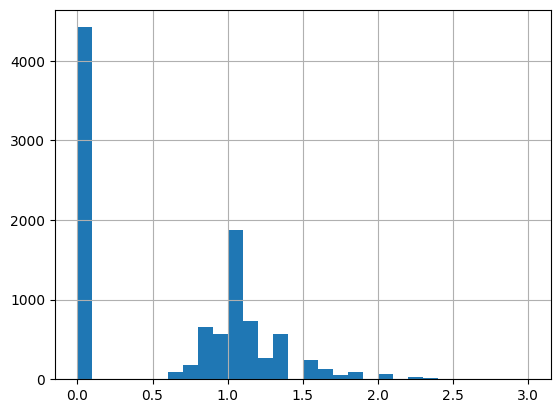

In [17]:
Bench_vs_Observed['avg_best_potential'].hist(bins=30)

### The two types of encoding 

In [8]:
# One hot encoding

pokemon_encoding(train_data, one_hot= True)

,battle_id,p1_alakazam_seen,p1_alakazam_fainted,p2_alakazam_seen,p2_alakazam_fainted,p1_articuno_seen,p1_articuno_fainted,p2_articuno_seen,p2_articuno_fainted,p1_chansey_seen,...,p2_tauros_fainted,p1_victreebel_seen,p1_victreebel_fainted,p2_victreebel_seen,p2_victreebel_fainted,p1_zapdos_seen,p1_zapdos_fainted,p2_zapdos_seen,p2_zapdos_fainted,player_won
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,True
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,True
2,2,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,True
3,3,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,1,0,True
4,4,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,False
9996,9996,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,False
9997,9997,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,False
9998,9998,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,False


In [9]:
# label encoding

pokemon_encoding(train_data, one_hot= False)

,battle_id,p1_pokemon_1,p1_status_1,p1_pokemon_2,p1_status_2,p1_pokemon_3,p1_status_3,p1_pokemon_4,p1_status_4,p1_pokemon_5,...,p2_status_2,p2_pokemon_3,p2_status_3,p2_pokemon_4,p2_status_4,p2_pokemon_5,p2_status_5,p2_pokemon_6,p2_status_6,player_won
0,0,16,1,6,0,2,1,15,1,-1,...,1,15,1,2,0,-1,-1,-1,-1,True
1,1,10,0,15,0,6,0,17,1,2,...,1,15,1,6,1,16,1,17,1,True
2,2,6,0,15,1,2,1,-1,-1,-1,...,1,17,1,7,1,-1,-1,-1,-1,True
3,3,7,0,15,1,2,0,6,0,19,...,1,15,1,19,1,-1,-1,-1,-1,True
4,4,0,1,2,1,6,1,15,0,17,...,1,17,1,2,1,15,1,-1,-1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,6,1,2,1,15,0,13,0,16,...,1,17,1,2,1,15,1,19,1,False
9996,9996,0,0,6,1,13,1,2,0,14,...,1,6,1,17,1,15,1,13,1,False
9997,9997,13,1,19,1,6,0,0,1,-1,...,1,15,1,2,1,4,1,-1,-1,False
9998,9998,6,1,16,0,2,0,13,0,15,...,1,2,1,17,1,19,1,-1,-1,False


# Models

## Logistic Regression

### The final dataset ONE-HOT encoding

In [16]:
final_table_train=generate_features(train_data, difference = True, flag_test=False, tree=False, divide_turns=True)
final_table_test=generate_features(test_data, difference = True, flag_test=True, tree=False, divide_turns=True)

In [4]:
final_table_train.shape

# to csv

# final_table_train.to_csv('final_table_train.csv', index=False)

(10000, 151)

In [17]:
Y_train = final_table_train['player_won'].astype(int)

X_train = final_table_train.drop(columns=['player_won', 'battle_id'])

X_test = final_table_test.drop(columns=['battle_id'])

X_test.shape


(5000, 149)

### Correlation and PCA

In [6]:
top_correlated_features(X_train)

,Feature 1,Feature 2,Correlation
527,last_10_spd_diff,last_10_spa_diff,1.000000
209,first_10_spd_diff,first_10_spa_diff,1.000000
350,middle_10_spd_diff,middle_10_spa_diff,1.000000
9,avg_team_vs_lead_spd_diff,avg_team_vs_lead_spa_diff,1.000000
104,avg_spd_boost_diff,avg_spa_boost_diff,0.999999
1484,p1_gained_team_adv_count,total_team_hp_adv_flips,0.904938
1538,p2_gained_team_adv_count,total_team_hp_adv_flips,0.901275
2,avg_team_vs_lead_def_diff,avg_team_vs_lead_atk_diff,0.859356
1539,p2_gained_team_adv_count,p1_gained_team_adv_count,0.856239
170,first_10_def_diff,first_10_atk_diff,0.825655


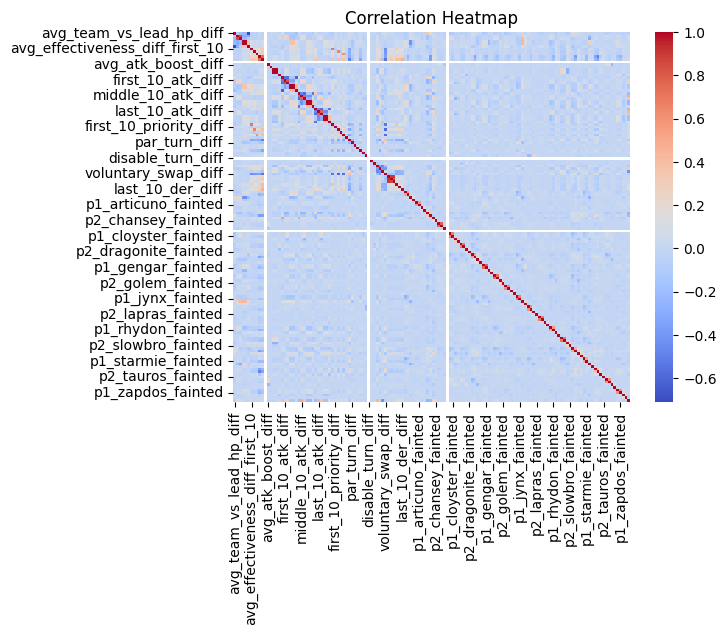

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt 
corr = X_train.corr()
plt.figure()
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

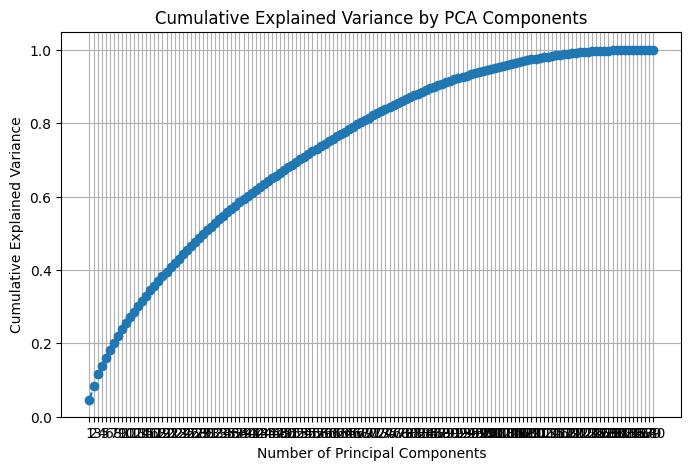

array([0.0460696 , 0.08280251, 0.11573876, 0.13905747, 0.16062788,
       0.18167905, 0.20171708, 0.2205338 , 0.23833813, 0.25529012,
       0.27134775, 0.28682313, 0.30167317, 0.31619929, 0.33053879,
       0.34443676, 0.35776971, 0.37071577, 0.38318444, 0.39551286,
       0.40767254, 0.41949716, 0.43114726, 0.4427552 , 0.45420974,
       0.46549532, 0.47659973, 0.48758353, 0.49815011, 0.50851501,
       0.51867665, 0.52849312, 0.53821593, 0.54782118, 0.55718199,
       0.56638841, 0.57548793, 0.58447005, 0.59321099, 0.60174493,
       0.61015026, 0.61832011, 0.62641682, 0.63439046, 0.64227264,
       0.65004999, 0.65764672, 0.6651849 , 0.67267906, 0.6801208 ,
       0.68746528, 0.69478851, 0.70202286, 0.70922096, 0.71638702,
       0.7235015 , 0.73050829, 0.73747177, 0.74436822, 0.75119659,
       0.75796159, 0.76468974, 0.7712924 , 0.77781838, 0.78429725,
       0.79067045, 0.79698447, 0.80324489, 0.8094178 , 0.81553002,
       0.82160788, 0.82756195, 0.83341897, 0.83921905, 0.84489

In [20]:
plot_pca_variance(X_train)

In [21]:
print(X_train['avg_approx_damage_diff'].corr(X_train['avg_effectiveness_diff_first_10']))
print(X_train['avg_approx_damage_diff'].corr(X_train['avg_effectiveness_diff_middle_10']))
print(X_train['avg_approx_damage_diff'].corr(X_train['avg_effectiveness_diff_last_10']))


0.0352536532465028
0.01449739221595835
0.01833419282086839


### Tuning hyperparameters with Grid Search

- with NO PCA the L2 regularization with the hyperparameter C manage directly the collinearity and prevents the model from assigning huge importance to any single feature, making it less sensitive to noise in the training data and better at generalizing.

- with PCA we remove collinearity before the fit. Then, L2 Regularization just preventing overfitting on the new, smaller set of n_components uncorrelated features.

In [6]:
pipeline_no_pca = create_model_pipeline(random_state=1920)

param_grid_no_pca = {
    'model__C': [0.001, 0.005, 0.007, 0.05, 0.1, 0.5, 1, 5, 7, 10]
}

print("--- Grid Search for Non-PCA Model ---")
best_model_no_pca = perform_grid_search(
    pipeline_no_pca, 
    param_grid_no_pca, 
    X_train, 
    Y_train,
    cv_splits=5

)

--- Grid Search for Non-PCA Model ---
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Grid Search Complete.
Best parameters found: {'model__C': 0.05}
Best cross-validation accuracy: 0.85040000
Best CV accuracy std dev: 0.00649153


In [18]:
pipeline_pca = create_model_pipeline_PCA(random_state=1904)


param_grid_pca = {
    'pca__n_components': list(range(120,X_train.shape[1])),  # Test different numbers of components 
    'model__C': [0.04,0.05, 0.07, 0.08]  # Test different C values
}

print("\n--- Grid Search for PCA Model ---")
best_model_pca = perform_grid_search(
    pipeline_pca, 
    param_grid_pca, 
    X_train, 
    Y_train,
    cv_splits=10
)


--- Grid Search for PCA Model ---
Fitting 10 folds for each of 116 candidates, totalling 1160 fits

Grid Search Complete.
Best parameters found: {'model__C': 0.05, 'pca__n_components': 129}
Best cross-validation accuracy: 0.85160000
Best CV accuracy std dev: 0.00936162


#### try polynomial features with degree 2

In [8]:

pipeline_poly = create_model_pipeline_poly(max_iter=4000, random_state=0)

param_grid_poly = {
    'poly_features__degree': [2],  # Test degree 2 and 3
    'model__C': [0.0005,0.0001]  # Test different C values
}       

print("\n--- Grid Search for Polynomial Features Model ---")
best_model_poly = perform_grid_search(
    pipeline_poly, 
    param_grid_poly, 
    X_train, 
    Y_train
)   


--- Grid Search for Polynomial Features Model ---
Fitting 5 folds for each of 2 candidates, totalling 10 fits

Grid Search Complete.
Best parameters found: {'model__C': 0.0005, 'poly_features__degree': 2}
Best cross-validation accuracy: 0.80500000
Best CV accuracy std dev: 0.00971082


### Train the models with the best hyperparameters

In [22]:
pipeline_pca=create_model_pipeline_PCA(c_value=0.05, n_components=129)

make_submission(pipeline=pipeline_pca, X_train=X_train, Y_train=Y_train, X_test=X_test, test_battle_ids=final_table_test['battle_id'], name='pca')


Training the pipeline...
Training complete.
Making predictions...
Predictions complete.
Submission saved to submission_pca.csv


## SVM

In [9]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe_SVM = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', SVC(random_state=42))
])

param_grid_SVM = {
    'model__C': [1],      
    'model__gamma': [0.005], 
    'model__kernel': ['rbf']
}

print("\n--- Grid Search for SVM Model ---")
best_model_SVM = perform_grid_search(
    pipe_SVM, 
    param_grid_SVM, 
    X_train, 
    Y_train,
    cv_splits=5
)


--- Grid Search for SVM Model ---
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Grid Search Complete.
Best parameters found: {'model__C': 1, 'model__gamma': 0.005, 'model__kernel': 'rbf'}
Best cross-validation accuracy: 0.83850000
Best CV accuracy std dev: 0.01254193


## tree based models ( TO BE TUNED!! )

#### the final dataset ( NO ONE-HOT encoding)

In [3]:
final_table_train=generate_features(train_data, difference = True, flag_test=False, tree=True)
final_table_test=generate_features(test_data, difference = True, flag_test=True, tree=True)

In [4]:
final_table_train.head()

,battle_id,avg_team_vs_lead_hp_diff,avg_team_vs_lead_atk_diff,avg_team_vs_lead_def_diff,avg_team_vs_lead_spa_diff,avg_team_vs_lead_spd_diff,avg_team_vs_lead_spe_diff,faint_count_diff,avg_final_hp_pct_diff,var_final_hp_pct_diff,...,status_brn_diff,status_tox_diff,status_psn_diff,status_par_diff,status_slp_diff,status_nostatus_diff,status_frz_diff,pok_used_diff,avg_approx_damage_diff,player_won
0,0,55.833333,-2.500000,-21.666667,0.000000,0.000000,-35.000000,0,0.204219,0.0,...,0,0,0,0,0,1,-1,0,91.487101,True
1,1,68.333333,22.500000,20.833333,-45.000000,-45.000000,-58.333333,-3,-0.165000,0.0,...,0,0,0,-2,-1,0,0,0,-48.612688,True
2,2,-125.833333,79.166667,66.666667,-15.000000,-15.000000,15.833333,-1,0.003333,0.0,...,0,0,0,-1,-1,0,0,-1,-3.669552,True
3,3,46.666667,-22.500000,-29.166667,33.333333,33.333333,-34.166667,-3,-0.136667,0.0,...,0,0,0,0,-1,-1,0,1,-667.892355,True
4,4,54.166667,0.833333,-5.833333,-2.500000,-2.500000,-42.500000,-1,0.101667,0.0,...,0,0,0,-2,0,1,0,0,63.991511,True


In [5]:
Y_train_tree = final_table_train['player_won'].astype(int)

X_train_tree = final_table_train.drop(columns=['player_won', 'battle_id'])

X_test_tree = final_table_test.drop(columns=['battle_id'])

X_test_tree.shape

(5000, 90)

### Random Forest 

In [18]:
# TODO crea pipeline con funzione create_model_pipeline_rf
pipeline_rf=create_model_pipeline_rf()

# grid search for Random Forest hyperparameters
param_grid_rf = {
    'model__n_estimators': [800],
    'model__max_depth': [25],
    'model__min_samples_split': [5],
    'model__min_samples_leaf': [1],
} 

best_xgb = perform_grid_search(
    pipeline_rf, 
    param_grid_rf, 
    X_train_tree, 
    Y_train_tree
)

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Grid Search Complete.
Best parameters found: {'model__max_depth': 25, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 800}
Best cross-validation accuracy: 0.83760000
Best CV accuracy std dev: 0.01183385


### XGBoost

In [40]:
pipeline_xgb = create_model_pipeline_xgb()

param_grid_xgb = {
    'model__learning_rate': [0.01],
    'model__n_estimators': [1700],
    
    'model__max_depth': [4],
    'model__subsample': [0.7],
    'model__colsample_bytree': [0.9],

    'model__gamma': [0.25],
    'model__reg_alpha': [0.1],
    'model__reg_lambda': [0.6]
}

best_xgb = perform_grid_search(
    pipeline_xgb, 
    param_grid_xgb, 
    X_train_tree, 
    Y_train_tree,
    cv_splits=10
)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Users/leonardosani/Projects/FDS_challenge_1/.venv/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:38:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/leonardosani/Projects/FDS_challenge_1/.venv/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:38:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/leonardosani/Projects/FDS_challenge_1/.venv/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:38:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/leonardosani/Projects/FDS_challenge_1/.venv/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:38:29] WARN


Grid Search Complete.
Best parameters found: {'model__colsample_bytree': 0.9, 'model__gamma': 0.25, 'model__learning_rate': 0.01, 'model__max_depth': 4, 'model__n_estimators': 1700, 'model__reg_alpha': 0.1, 'model__reg_lambda': 0.6, 'model__subsample': 0.7}
Best cross-validation accuracy: 0.85320000
Best CV accuracy std dev: 0.01343726


In [34]:
pipeline_xgb = create_model_pipeline_xgb(colsample_bytree=0.9, gamma=0.25, learning_rate=0.01, max_depth=4, n_estimators=1700, reg_alpha=0.1, reg_lambda=0.6, subsample=0.7)
make_submission(pipeline=pipeline_xgb, X_train=X_train_tree, Y_train=Y_train_tree, X_test=X_test_tree, test_battle_ids=final_table_test['battle_id'], name='xgb')

Training the pipeline...


/Users/leonardosani/Projects/FDS_challenge_1/.venv/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:05:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training complete.
Making predictions...
Predictions complete.
Submission saved to submission_xgb.csv


## Ensembling

In [36]:
# Create a copy to avoid changing your originals
X_main_df = X_train.copy()
X_tree_df = X_train_tree.copy()

# Add a 'main' level to the columns of X_train
X_main_df.columns = pd.MultiIndex.from_product(
    [['main'], X_main_df.columns]
)

# Add a 'tree' level to the columns of X_train_tree
X_tree_df.columns = pd.MultiIndex.from_product(
    [['tree'], X_tree_df.columns]
)

# Concatenate them side-by-side
X_combined_train = pd.concat([X_main_df, X_tree_df], axis=1)


In [37]:
# Create a copy to avoid changing your originals
X_main_test_df = X_test.copy()
X_tree_test_df = X_test_tree.copy()

# Add a 'main' level to the columns of X_train
X_main_test_df.columns = pd.MultiIndex.from_product(
    [['main'], X_main_test_df.columns]
)

# Add a 'tree' level to the columns of X_train_tree
X_tree_test_df.columns = pd.MultiIndex.from_product(
    [['tree'], X_tree_test_df.columns]
)

# Concatenate them side-by-side
X_combined_test = pd.concat([X_main_test_df, X_tree_test_df], axis=1)

In [38]:
# Logistic Regression with PCA
lr_pipeline = create_model_pipeline_PCA(
    random_state=0,
    c_value=0.1,
    n_components=132
)

# Random Forest
rf_pipeline = create_model_pipeline_rf(
    random_state=0,
    n_estimators=800,
    max_depth=25,
    min_samples_split=5,
    min_samples_leaf=1
)

# XGBoost
xgb_pipeline = create_model_pipeline_xgb(colsample_bytree=0.9, gamma=0.25, learning_rate=0.01, max_depth=4, n_estimators=1700, reg_alpha=0.1, reg_lambda=0.6, subsample=0.7)


estimators = [
    ('lr_pca', lr_pipeline),
    ('rf', rf_pipeline),
    ('xgb', xgb_pipeline)
]
model_weights = [0.4, 0.4, 0.2]


my_voting_pipeline = CustomVoter(
    estimators=estimators,
    weights=model_weights
)

mean,std_dev=evaluate_model(my_voting_pipeline, X_combined_train, Y_train, cv_splits=10)

print(mean,std_dev)

/Users/leonardosani/Projects/FDS_challenge_1/.venv/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:07:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/leonardosani/Projects/FDS_challenge_1/.venv/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:07:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/leonardosani/Projects/FDS_challenge_1/.venv/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:07:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/leonardosani/Projects/FDS_challenge_1/.venv/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:08:03] WARN

0.8516999999999999 0.010640018796975886


In [39]:
make_submission(pipeline=my_voting_pipeline, X_train=X_combined_train, Y_train=Y_train, X_test=X_combined_test, test_battle_ids=final_table_test['battle_id'], name='Voting')

Training the pipeline...


/Users/leonardosani/Projects/FDS_challenge_1/.venv/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:09:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training complete.
Making predictions...
Predictions complete.
Submission saved to submission_Voting.csv
